In [2]:
maze = [[-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0, 0, 0,-1, 0, 0, 0,-1,-1, 0,-1,-1, 0, 0, 0, 0, 0, 0, 0, 0,-1,],
        [ 0, 0, 0, 0, 0, 0,-1, 0, 0, 0, 0, 0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,],
        [-1, 0,-1, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1,-1,-1, 0,-1,-1,-1, 0,-1,-1,],
        [-1, 0,-1, 0, 0, 0,-1, 0,-1, 0,-1,-1, 0, 0, 0, 0,-1,-1,-1, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0, 0,-1,-1, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1,-1,-1, 0, 0,-1, 0,-1, 0, 0,-1,-1, 0, 0, 0,-1,],
        [-1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0,-1, 0, 9,-1, 0,-1, 0, 0,-1,],
        [-1,-1,-1,-1,-1, 0,-1, 0, 0,-1, 0,-1, 0,-1, 0, 0, 0, 0, 0,-1, 0,-1,],
        [-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,]]

[[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0  0  0 -1  0  0  0 -1 -1  0 -1 -1  0  0  0  0  0  0  0  0 -1]
 [ 0  0  0  0  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
 [-1  0 -1  0  0  0  0 -1 -1  0  0 -1 -1 -1 -1  0 -1 -1 -1  0 -1 -1]
 [-1  0 -1  0  0  0 -1  0 -1  0 -1 -1  0  0  0  0 -1 -1 -1  0  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0 -1 -1  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1  0 -1  0 -1  0  0  0  0  0  0 -1 -1  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1  0 -1 -1 -1  0  0 -1  0 -1  0  0 -1 -1  0  0  0 -1]
 [-1  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  9 -1  0 -1  0  0 -1]
 [-1 -1 -1 -1 -1  0 -1  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1  0 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


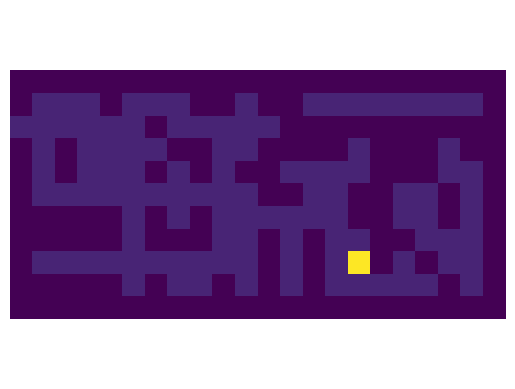

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import time
from IPython.display import display, clear_output

mmaze = np.array(maze)
y_b, x_b = mmaze.shape
print(mmaze)
plt.pcolor(mmaze[-1::-1,:])
plt.axis('equal')
plt.axis('off')
plt.show()